# Chapter 6 - ex8: Area plot, Boxplot
## Part 1: Area Plot
- Cho Dữ liệu Số giờ nắng các tháng trong năm 2016, 2017 tại trạm quan trắc Vũng tàu:
    - Hours_2017: 183.4, 211.8, 286.4, 287.5, 238.8, 200.3, 187.4, 233.8, 225.5, 149.1, 180.2,198.3
    - Hours_2016: 272.8, 254.0, 296.0, 298.0, 240.1, 197.8, 240.3, 219.5, 212.7, 134.7, 215.3, 109.1        
- Trên cùng một biểu đồ, hãy vẽ:
    - Area plot cho 12 tháng nắng trong năm 2016
    - Line plot cho 12 tháng nắng trong năm 2017

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
sb.set_style('white')

In [54]:
df = pd.DataFrame({'2017': [183.4, 211.8, 286.4, 287.5, 238.8, 200.3, 187.4, 233.8, 225.5, 149.1, 180.2,198.3],
                    '2016': [272.8, 254.0, 296.0, 298.0, 240.1, 197.8, 240.3, 219.5, 212.7, 134.7, 215.3, 109.1]}, 
                    index=np.arange(1,13,1))
df

,2017,2016
1,183.4,272.8
2,211.8,254.0
3,286.4,296.0
4,287.5,298.0
5,238.8,240.1
6,200.3,197.8
7,187.4,240.3
8,233.8,219.5
9,225.5,212.7
10,149.1,134.7


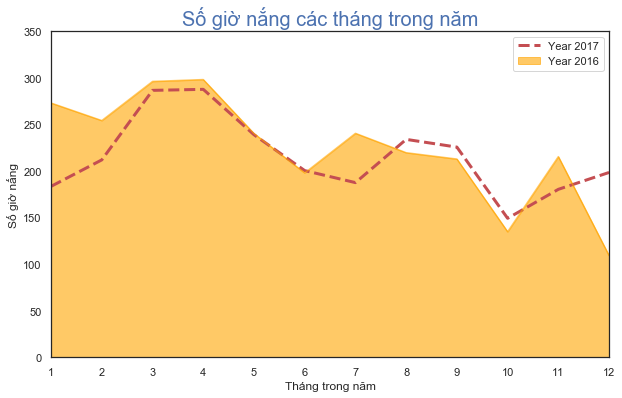

In [55]:
plt.figure(figsize=(10,6))
df['2017'].plot(kind='line', label='Year 2017', color='r', lw=3, ls='--')
df['2016'].plot(kind='area', label='Year 2016', color='orange', alpha=0.6)
plt.xlim(1,12)
plt.ylim(0,350)
plt.xticks(df.index)
plt.xlabel('Tháng trong năm')
plt.ylabel('Số giờ nắng')
plt.title('Số giờ nắng các tháng trong năm', fontsize=20, color='b')
plt.legend()
plt.show()

## Part 2: Boxplot
- Cho dữ liệu baseball.csv
- Vẽ boxplot cho dữ liệu trên
- Kiểm tra xem dữ liệu có outliers hay không? Nếu có thì loại bỏ các outliers. Vẽ lại boxplot

In [56]:
data = pd.read_csv('../data/baseball.csv', index_col=0)
data.head()

,height,weight
0,1.8796,81.646560
1,1.8796,97.522280
2,1.8288,95.254320
3,1.8288,95.254320
4,1.8542,85.275296


In [57]:
data.describe()

,height,weight
count,1015.000000,1015.000000
mean,1.871717,91.330191
std,0.058774,9.445198
min,1.701800,68.038800
25%,1.828800,84.368112
50%,1.879600,90.718400
75%,1.905000,97.522280
max,2.108200,131.541680


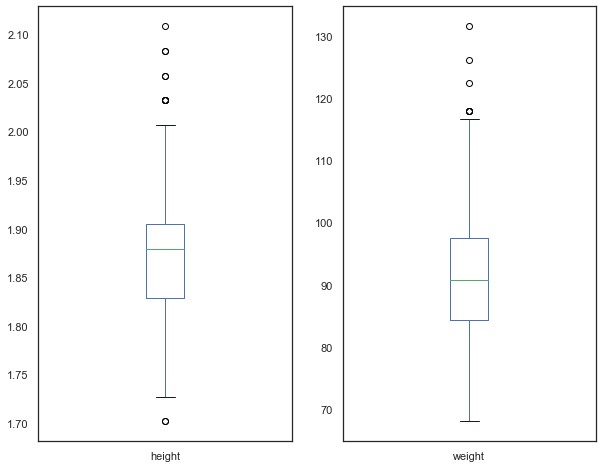

In [58]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
data['height'].plot(kind='box')
plt.subplot(1,2,2)
data['weight'].plot(kind='box')
plt.show()

In [59]:
Q1_H = data['height'].quantile(0.25)
Q3_H = data['height'].quantile(0.75)
IQR_H = Q3_H - Q1_H
lower_height = Q1_H - (1.5 * IQR_H)
upper_height = Q3_H + (1.5 * IQR_H)

Q1_W = data['weight'].quantile(0.25)
Q3_W = data['weight'].quantile(0.75)
IQR_W = Q3_W - Q1_W
lower_weight = Q1_W - (1.5 * IQR_W)
upper_weight = Q3_W + (1.5 * IQR_W)


In [60]:
result = data
result.head()

,height,weight
0,1.8796,81.646560
1,1.8796,97.522280
2,1.8288,95.254320
3,1.8288,95.254320
4,1.8542,85.275296


In [61]:
result = result.drop(result[result['height'] < lower_height].index)
result = result.drop(result[result['height'] > upper_height].index)
result = result.drop(result[result['weight'] < lower_weight].index)
result = result.drop(result[result['weight'] > upper_weight].index)

In [62]:
result.shape

(998, 2)

In [63]:
data.shape

(1015, 2)

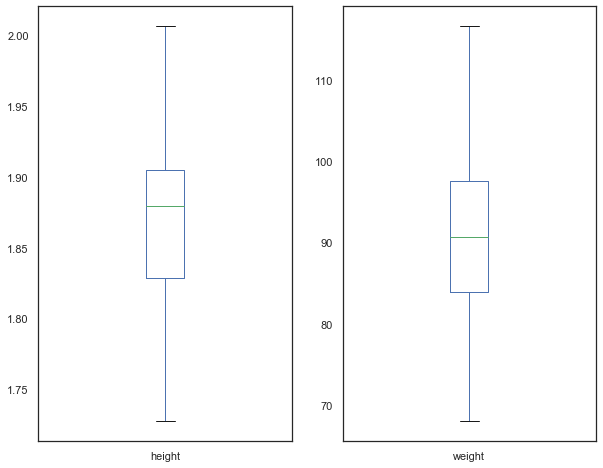

In [64]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
result['height'].plot(kind='box')
plt.subplot(1,2,2)
result['weight'].plot(kind='box')
plt.show()